In [1]:
%matplotlib inline

In [2]:
import numpy as np

from msslib.utils import *
import matplotlib.pyplot as plt
import matplotlib as mpl

import functools as f

from sklearn import metrics

In [3]:
def normalise_confusion_matrix(cm: np.ndarray):
    return cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

def plot_confusion_matrix(plt, score):
    c_m = normalise_confusion_matrix(score['c_matrix'])
    plt.imshow(c_m, interpolation='nearest', cmap=plt.cm.YlGn, vmin=0, vmax=1)

In [28]:
label_dir = "/home/finlay/HMT/data/VenetusA/1200Hx900W/labels/"
own_dir = "/home/finlay/HMT/data/VenetusA/1200Hx900W/pixels/nearest_centroid_own/"
scikit_dir = "/home/finlay/HMT/data/VenetusA/1200Hx900W/pixels/nearest_centroid_scikit/"

own_paths = listpaths(comp_dir)
scikit_paths = [format_path(scikit_dir, 'npy', only_basename(p)) for p in own_paths]
label_paths = [format_path(label_dir, 'png', only_basename(p)) for p in own_paths]

results = []

for own, sk, l in zip(own_paths, scikit_paths, label_paths):
    
    own_d = np.load(own).flatten()
    sk_d = np.load(sk).flatten()
    label = misc.imread(l).flatten()
    
    p1,r1,fs1, _ = metrics.precision_recall_fscore_support(label, own_d, average='weighted')
    p2,r2,fs2, _ = metrics.precision_recall_fscore_support(label, sk_d, average='weighted')

    results.append({'name': only_basename(l),
                    'own': {
                        'precision': p1,
                        'recall': r1,
                        'fscore': fs1,
                        }, 
                    'sk': {
                        'precision': p2,
                        'recall': r2,
                        'fscore': fs2,
                        }, 
                   })

/usr/lib/python3.5/site-packages/sklearn/metrics/classification.py:1076: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


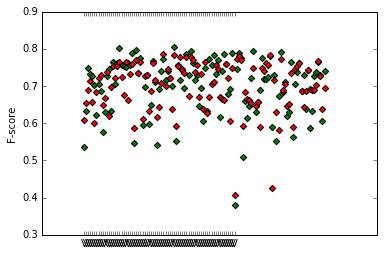

In [29]:
fig = plt.figure()
fs1 = [s['own']['fscore'] for s in results]
fs2 = [s['sk']['fscore'] for s in results]
labels = [s['name'][0] for s in results]
x = range(len(fs))
plt.scatter(np.arange(len(fs1)), fs1, c='green', marker='D')
plt.scatter(np.arange(len(fs2)), fs2, c='red', marker='D')
plt.xticks(x, labels)
plt.ylabel('F-score')



In [30]:
np.mean(fs1), np.mean(fs2)

(0.70156671821603067, 0.69770077322742141)

In [16]:
guid = list(filter(lambda x: x['fscore'] > 0.7, results))
shite = list(filter(lambda x: x['fscore'] < 0.7, results))

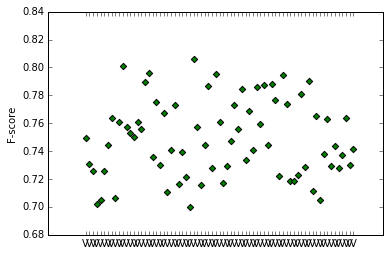

In [18]:
fig = plt.figure()
fs = [s['fscore'] for s in guid]
labels = [s['name'][0] for s in guid]
x = range(len(fs))
plt.scatter(np.arange(len(fs)), fs, c='green', marker='D')
plt.xticks(x, labels)
plt.ylabel('F-score')

In [22]:
max(results, key=lambda x: x['fscore'])

{'c_matrix': array([[ 25441,    519,     12,     30,   1633],
        [ 70009, 430810,  18343,  49764,  47591],
        [    91,   2137,  85583,  17447,   6576],
        [     0,    674,   1441,   8902,    117],
        [     0,   1655,   6915,  30060, 274250]]),
 'fscore': 0.80572790673006633,
 'name': 'VA193RN-0364',
 'precision': 0.89155545524736146,
 'recall': 0.7638759259259259}

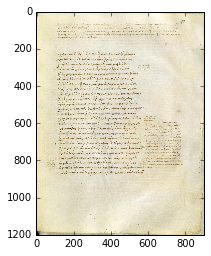

In [23]:
plt.imshow(misc.imread("/home/finlay/HMT/data/VenetusA/1200Hx900W/images/VA193RN-0364.jpg"))

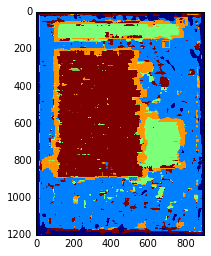

In [24]:
plt.imshow(np.load("/home/finlay/HMT/data/VenetusA/1200Hx900W/pixels/nearest_centroid_own/VA193RN-0364.npy"))

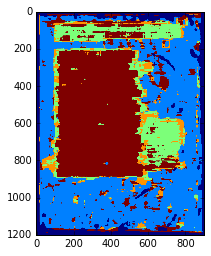

In [25]:
plt.imshow(np.load("/home/finlay/HMT/data/VenetusA/1200Hx900W/pixels/nearest_centroid_scikit/VA193RN-0364.npy"))